# Análisis de un archivo CSV sobre votaciones electorales en el estado de Queretaro

## Equipo 3
* Briones Tapia Sarahí
* Larrazolo Barrera Bruno
* López Guerrero Arcadio

Importamos las librerías necesarias

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

Función para obtener los distintos distritos

In [2]:
def limpiar_distritos(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["TOTAL_VOTOS_SACADOS"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos de un tipo de casilla

In [3]:
def votos_casilla(df,distrito,tipo):
    dist=df.loc[(df['DISTRITO_LOCAL']==distrito) & (df['TIPO_CASILLA']==tipo)]
    dist=dist["TOTAL_PERSONAS_VOTARON"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos nulos registrados

In [4]:
def votos_nulos(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["NULOS"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos registrados

In [5]:
def participacion_por_distrito(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["TOTAL_PERSONAS_VOTARON"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos esperados en cada distrito según la lista nominal

In [6]:
def esperados_por_distrito(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["LISTA_NOMINAL"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar el total de votos asentados en cada distrito

In [7]:
def ejercidos_por_distrito(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["TOTAL_VOTOS_ASENTADO"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos sacados de la urna registrados en una casilla

In [13]:
def votos_urna_por_distrito(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["TOTAL_VOTOS_SACADOS"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Funcion para obtener los distintos distritos

In [147]:
def obten_distritos_unicos(distritos):
    unicos = []

    for distrito in distritos:
        if distrito in unicos:
            continue
        else:
            unicos.append(distrito)
    return unicos

distritos=df[df.columns[5]]
distritos=list(distritos)

Limpieza del CSV base

In [15]:
#______________Limpieza del archivo base_______________________________
datos=pd.read_csv('QRO_DIP_LOC_2018.csv', skiprows=5)
columna_clave_acta= datos['CLAVE_ACTA']
columna_clave_casilla= datos['CLAVE_CASILLA']

#Limpieza de la columna CLAVE_ACTA
for i in range(len(columna_clave_acta)):
    if str(datos.loc[i, 'CLAVE_ACTA']).find("E"):
        datos.loc[i, 'CLAVE_ACTA']=str(datos.loc[i, 'CLAVE_ACTA'])[1:]
    else:
        datos.loc[i, 'CLAVE_ACTA'] = str(datos.loc[i, 'CLAVE_ACTA'].replace("'",""))
    
#Limpieza de la columna CLAVE_CASILLA
for j in range(len(columna_clave_casilla)):
    if str(datos.loc[j, 'CLAVE_CASILLA']).find("E"):
        datos.loc[j, 'CLAVE_CASILLA']=str(datos.loc[j, 'CLAVE_CASILLA'])[1:]
    else:
        datos.loc[j, 'CLAVE_CASILLA'] = str(datos.loc[j, 'CLAVE_CASILLA'].replace("'",""))

#Guardamos el nuevo archivo
datos.to_csv('archivo_modificado.csv', index=False)

## Visualizaciones importantes sobre los datos que se encontraron en el CSV

In [16]:
df=pd.read_csv('QRO_DIP_LOC_2018.csv', skiprows=5)
df.head()

,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,ESTADO,ID_DISTRITO_LOCAL,DISTRITO_LOCAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,OBSERVACIONES,CONTABILIZADA,MECANISMOS_TRASLADO,SHA,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,ORIGEN,DIGITALIZACION,TIPO_DOCUMENTO
0,220277B0100,220277B0100,22,QUERETARO,1,QUERETARO 01,277,961,B,0,...,NaN,1.0,D,77B4E74C39AA83026388F7148239AF76816E8B6D29CC03...,02/07/2018 01:18:43,02/07/2018 02:18:53,02/07/2018 04:25:39,CATD,ESCANER,ACTA PREP
1,220277C0100,220277C0100,22,QUERETARO,1,QUERETARO 01,277,962,C,0,...,NaN,1.0,D,C055A6A27C574F57BE0185476BC19756D0290CB26C9FB6...,02/07/2018 01:17:20,02/07/2018 04:40:41,02/07/2018 05:41:19,CATD,ESCANER,ACTA PREP
2,220277C0200,220277C0200,22,QUERETARO,1,QUERETARO 01,277,963,C,0,...,NaN,1.0,D,83A57141BC2CB59F7A4D43069AF9DBBA5B13B61320FC59...,02/07/2018 00:42:16,02/07/2018 01:03:58,02/07/2018 01:15:12,CATD,ESCANER,ACTA PREP
3,220277C0300,220277C0300,22,QUERETARO,1,QUERETARO 01,277,964,C,0,...,NaN,1.0,D,AB96359CA2A806F9B8A96D9666FC3D74571BA564F32DA1...,02/07/2018 01:18:11,02/07/2018 02:40:52,02/07/2018 05:05:53,CATD,ESCANER,ACTA PREP
4,220277C0400,220277C0400,22,QUERETARO,1,QUERETARO 01,277,965,C,0,...,NaN,1.0,D,4D527753D1E7D940AEA1CE9FF61E66A3237D5255359759...,02/07/2018 00:42:51,02/07/2018 01:09:11,02/07/2018 01:37:26,CATD,ESCANER,ACTA PREP


Visualizaremos de manera general el tipo de datos que contiene:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 83 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CLAVE_CASILLA                 2648 non-null   object 
 1   CLAVE_ACTA                    2648 non-null   object 
 2   ID_ESTADO                     2648 non-null   int64  
 3   ESTADO                        2648 non-null   object 
 4   ID_DISTRITO_LOCAL             2648 non-null   int64  
 5   DISTRITO_LOCAL                2648 non-null   object 
 6   SECCION                       2648 non-null   int64  
 7   ID_CASILLA                    2648 non-null   int64  
 8   TIPO_CASILLA                  2648 non-null   object 
 9   EXT_CONTIGUA                  2648 non-null   int64  
 10  UBICACION_CASILLA             2648 non-null   object 
 11  TIPO_ACTA                     2648 non-null   int64  
 12  TOTAL_BOLETAS_SOBRANTES       2475 non-null   object 
 13  TOT

01 - Consulta para obtener cuantas casillas hay en cada distrito del estado de Queretaro

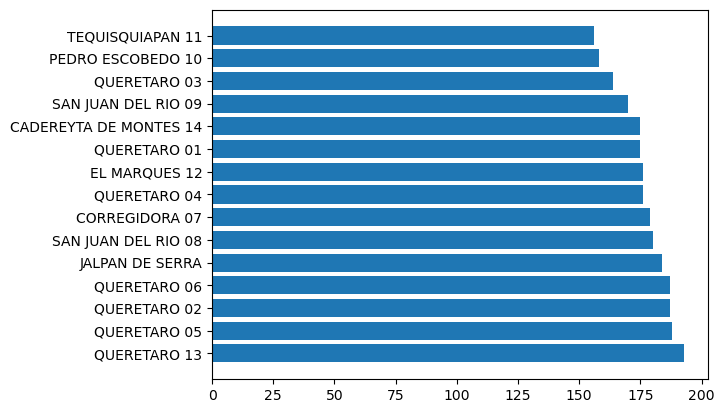

In [18]:
cantidad_de_casillas_p_estado=df["DISTRITO_LOCAL"].value_counts()

fig,ax = plt.subplots()
ax.barh(cantidad_de_casillas_p_estado.index,cantidad_de_casillas_p_estado)
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=10)
plt.show()

02 - Consulta para obtener cuantos tipos de casillas distintas hay

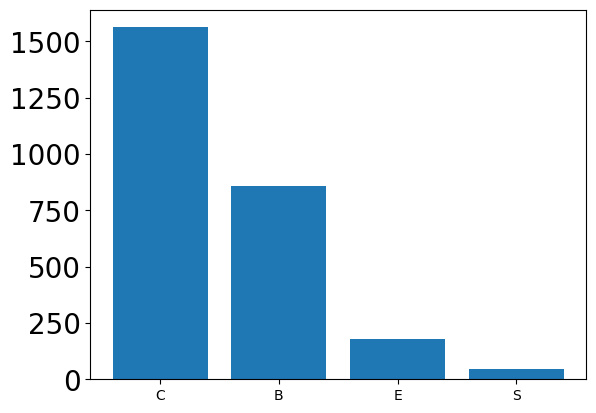

In [19]:
cantidad_tipos_de_casillas=df["TIPO_CASILLA"].value_counts()


plt.bar(cantidad_tipos_de_casillas.index,cantidad_tipos_de_casillas)
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=10)
plt.show()

03 - Consulta para obtener y graficar la cantidad de casillas con ubicaciones "urbanas" y "no urbanas"

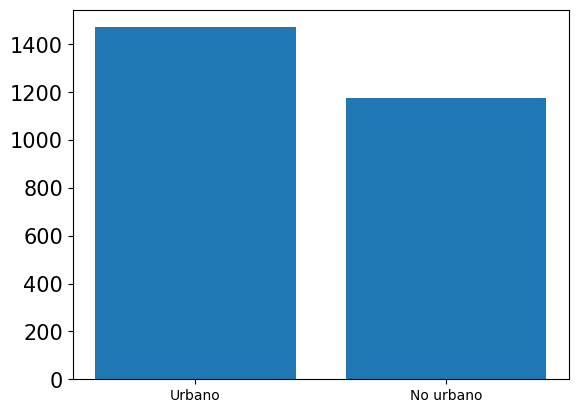

In [20]:
casillas_urbana=df.query('UBICACION_CASILLA == "URBANA"')
casillas_urbana=casillas_urbana.loc[:,'UBICACION_CASILLA']
casillas_no_urbana=df.query('UBICACION_CASILLA != "URBANA"')
casillas_no_urbana=casillas_no_urbana.loc[:,'UBICACION_CASILLA']
plt.bar(['Urbano','No urbano'], [len(casillas_urbana),len(casillas_no_urbana)])
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
plt.show()

04 - Consulta para obtener la cantidad de los distintos tipos de actas 

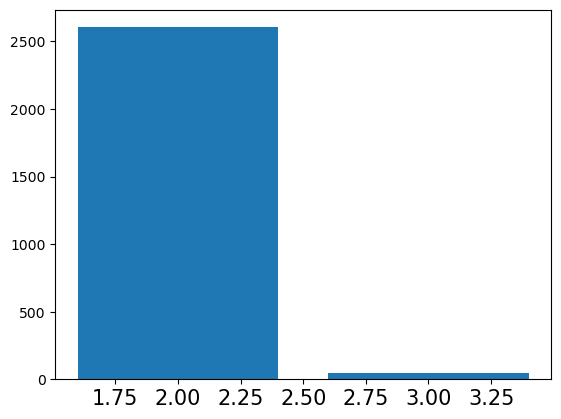

In [21]:
cantidad_tipos_de_actas=df["TIPO_ACTA"].value_counts()
plt.bar(cantidad_tipos_de_actas.index,cantidad_tipos_de_actas)
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=10)
plt.show()

* Obtenemos una lista de los distritos que conforman los registros del CSV

In [22]:
distritos_distintos=df["DISTRITO_LOCAL"].unique().tolist()

05 - Consulta para obtener la cantidad de votos obtenidos por distrito

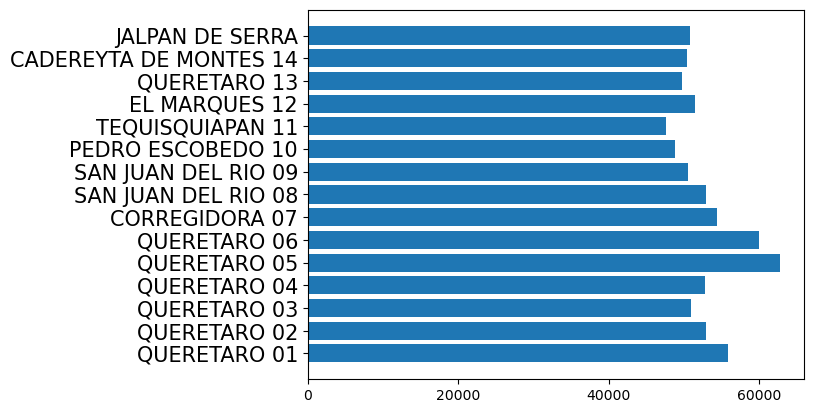

In [23]:
lista_totales=[]
for i in distritos_distintos:
    lista_totales.append(limpiar_distritos(df,i))
    

fig,ax = plt.subplots()
ax.barh(distritos_distintos,lista_totales)
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=20)
plt.show()

06 - Consulta para analizar el Total de Votos que fueron capturados en casillas contiguas

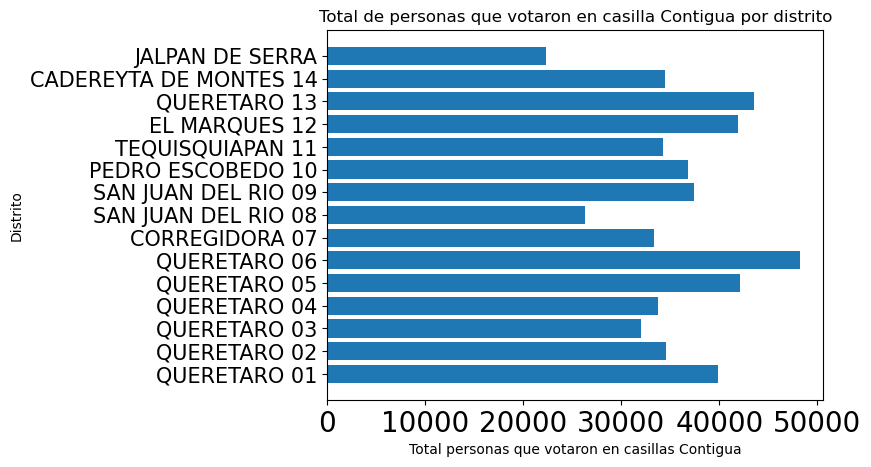

In [24]:
casilla_basica="C"
total_votos_casillas_contiguas=[]
for i in distritos_distintos:
    total_votos_casillas_contiguas.append(votos_casilla(df,i,casilla_basica))



fig,ax = plt.subplots()
ax.barh(distritos_distintos,total_votos_casillas_contiguas)
plt.title('Total de personas que votaron en casilla Contigua por distrito')
plt.xlabel('Total personas que votaron en casillas Contigua')
plt.ylabel('Distrito')
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 7)
plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.show()

07 - Consulta para analizar el Total de Votos que fueron capturados en casillas especiales

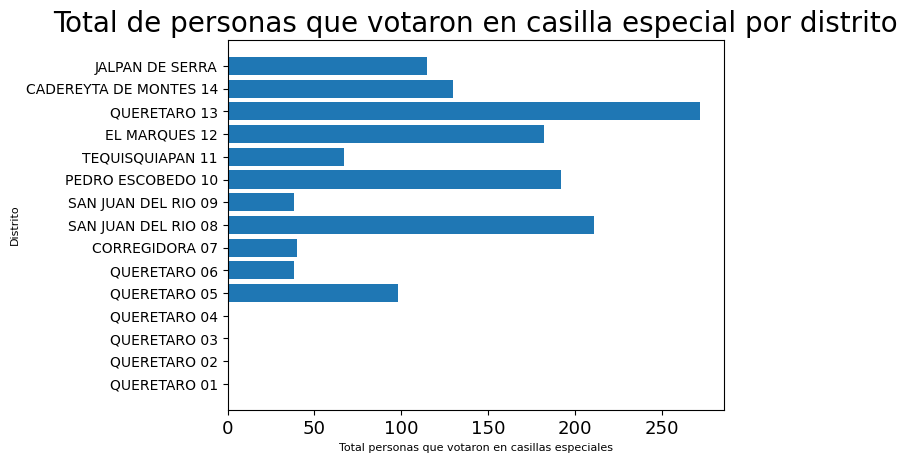

In [123]:
casilla_especial="S"
total_votos_casillas_especiales=[]
for i in distritos_distintos:
    total_votos_casillas_especiales.append(votos_casilla(df,i,casilla_especial))


fig,ax = plt.subplots()
ax.barh(distritos_distintos,total_votos_casillas_especiales)
plt.title('Total de personas que votaron en casilla especial por distrito')
plt.xlabel('Total personas que votaron en casillas especiales')
plt.ylabel('Distrito')
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 13)
plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.show()

08 - Consulta para analizar los Votos Nulos por distrito

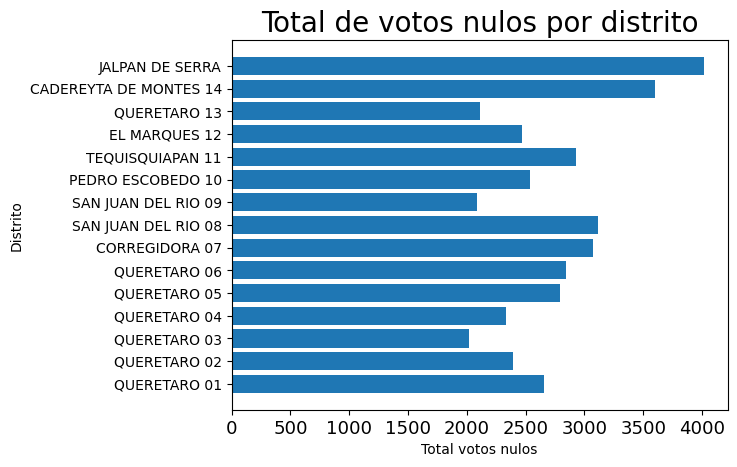

In [26]:
total_votos_nulos=[]
for i in distritos_distintos:
    total_votos_nulos.append(votos_nulos(df,i))


fig,ax = plt.subplots()
ax.barh(distritos_distintos,total_votos_nulos)
plt.title('Total de votos nulos por distrito')
plt.xlabel('Total votos nulos')
plt.ylabel('Distrito')
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 13)
plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.show()

09 - Consulta para analizar la participación ciudadana por distrito

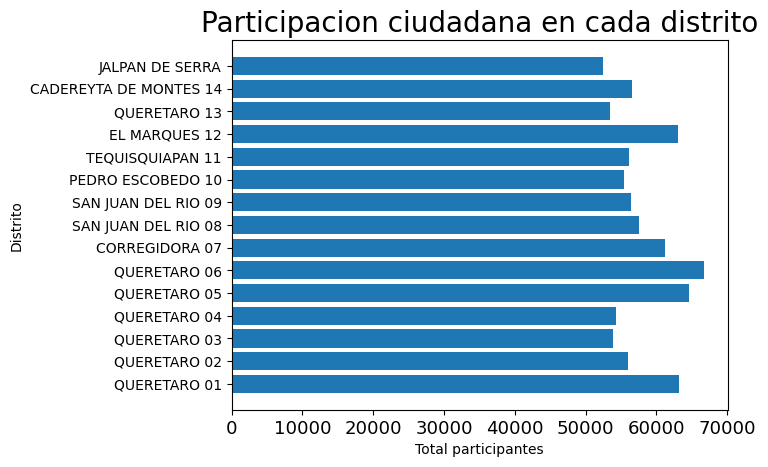

In [27]:
total_participacion=[]
for i in distritos_distintos:
    total_participacion.append(participacion_por_distrito(df,i))

fig,ax = plt.subplots()
ax.barh(distritos_distintos,total_participacion)
plt.title('Participacion ciudadana en cada distrito')
plt.xlabel('Total participantes')
plt.ylabel('Distrito')
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 13)
plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.show()

10 - Consulta para analizar los votantes que no asistieron, de acuerdo a la lista nominal y el total de votos asentados por cada distrito

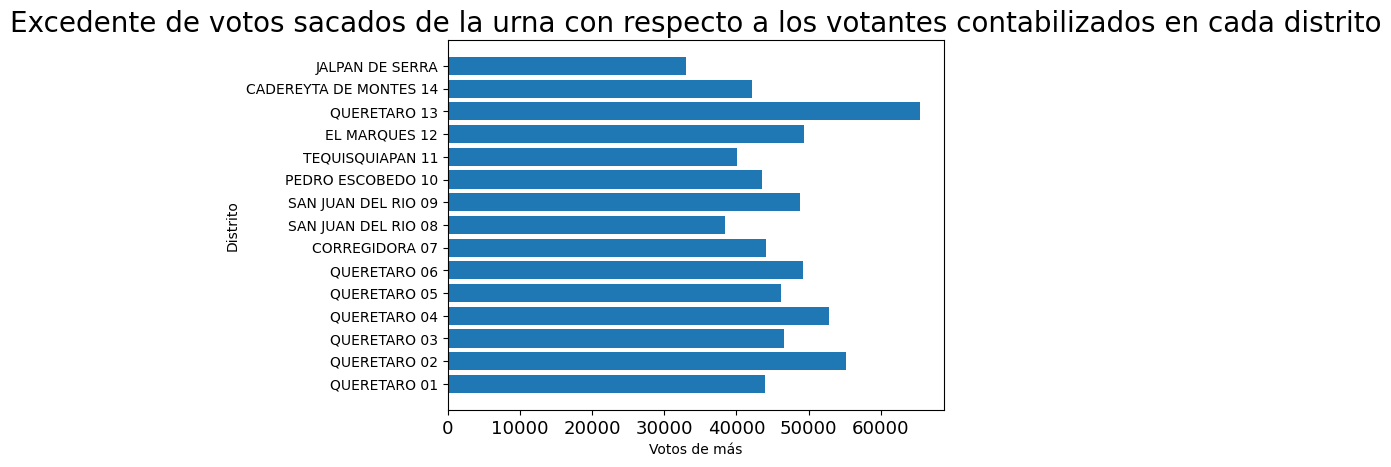

In [28]:
total_votos_esperados=[]
for i in distritos_distintos:
    total_votos_esperados.append(esperados_por_distrito(df,i))
    
total_votos_ejercidos=[]
for j in distritos_distintos:
    total_votos_ejercidos.append(ejercidos_por_distrito(df,j))

faltante_votos=[]
for s in range(len(total_votos_esperados)):
    faltante_votos.append(abs(total_votos_esperados[s]-total_votos_ejercidos[s]))

fig,ax = plt.subplots()
ax.barh(distritos_distintos,faltante_votos)
plt.title('Excedente de votos sacados de la urna con respecto a los votantes contabilizados en cada distrito')
plt.xlabel('Votos de más')
plt.ylabel('Distrito')
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize= 10)
plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.show()

11 - Consulta para analizar el excedente de votos sacados de la urna en relacion con los votantes contabilizados por distrito

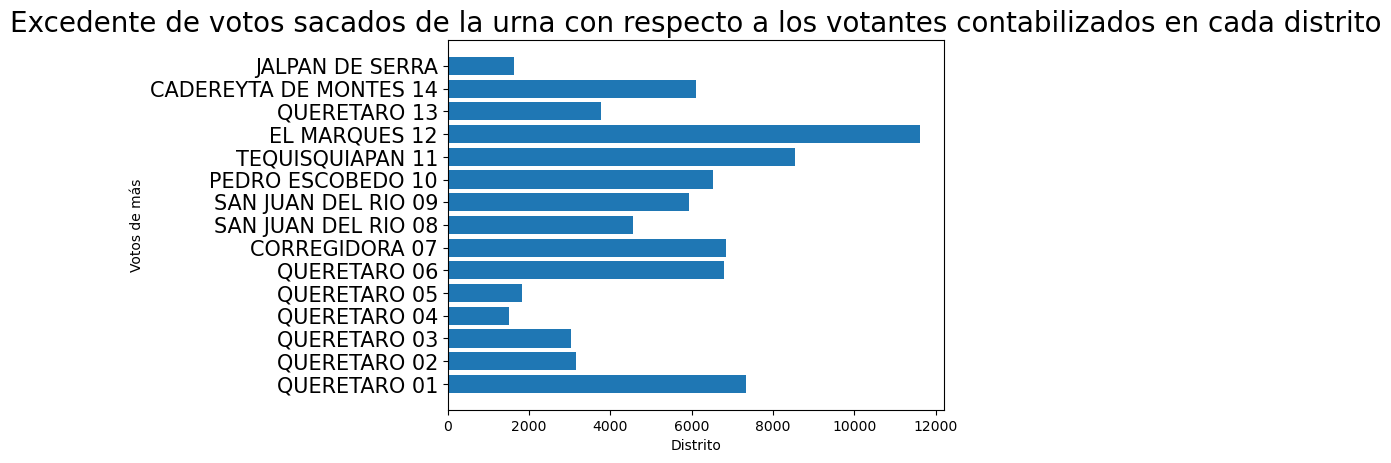

In [29]:
total_participacion=[]
for i in distritos_distintos:
    total_participacion.append(participacion_por_distrito(df,i))
    
total_votos_sacados_urna=[]
for j in distritos_distintos:
    total_votos_sacados_urna.append(votos_urna_por_distrito(df,j))

excedente_votos=[]
for s in range(len(total_participacion)):
    excedente_votos.append(abs(total_votos_sacados_urna[s]-total_participacion[s]))



fig,ax = plt.subplots()
ax.barh(distritos_distintos,excedente_votos)
plt.title('Excedente de votos sacados de la urna con respecto a los votantes contabilizados en cada distrito')
plt.xlabel('Distrito')
plt.ylabel('Votos de más')
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize= 10)
plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.show()

En esta consulta obtendremos el total de votos en Queretaro

51


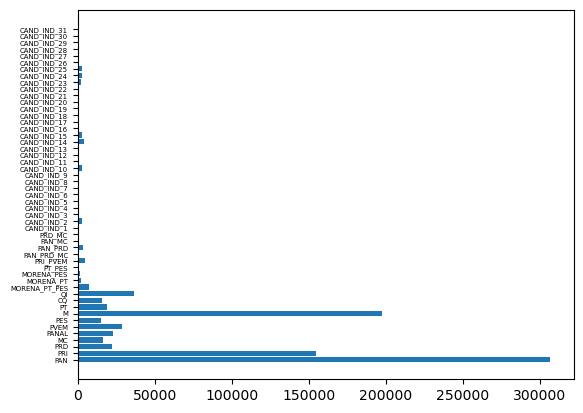

In [53]:
partidos=df[df.columns[16:67]]
partidos_list=[]
for i in range(len(list(partidos))):
    votos_partido=list(partidos[partidos.columns[i]])
    r=[]
    for j in votos_partido:
        try:
            r.append(int(j))
        except:
            pass
    partidos_list.append(r)

totales=[]


for l in partidos_list:
    totales.append(sum(l))
nombres_partidos = partidos.columns.values
plt.rc('font', size=10)
plt.rc('ytick', labelsize=5) 

fig,ax = plt.subplots()
ax.barh(nombres_partidos,totales)
plt.show()


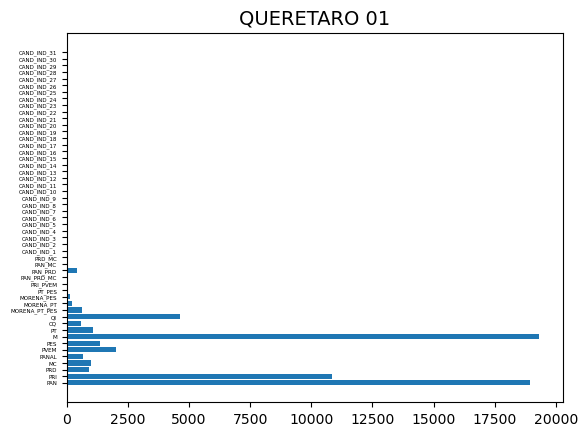

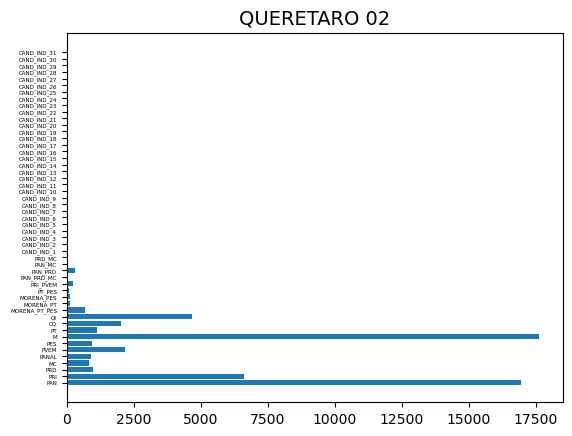

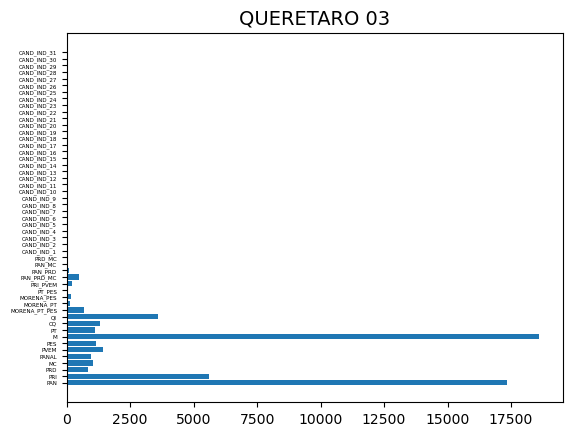

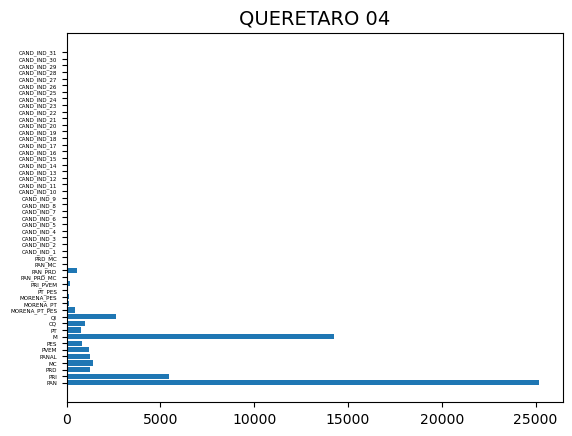

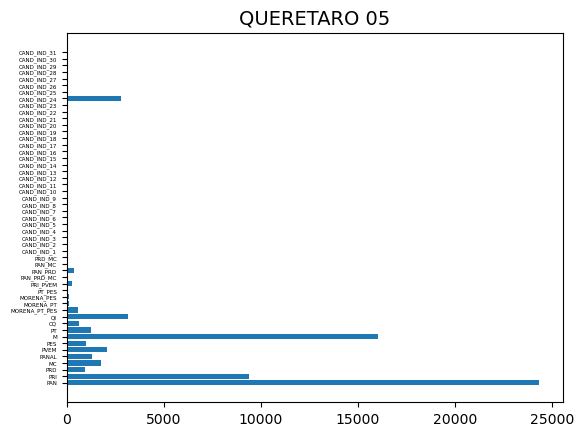

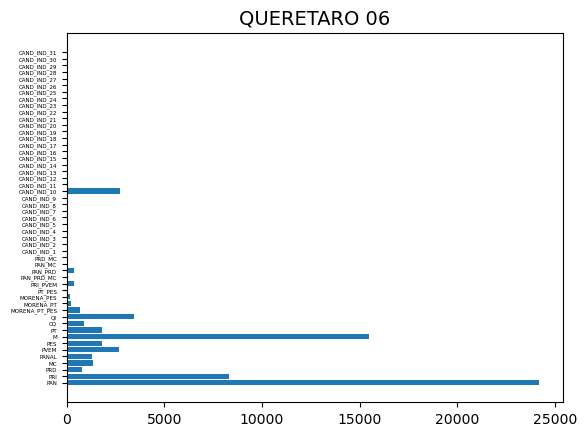

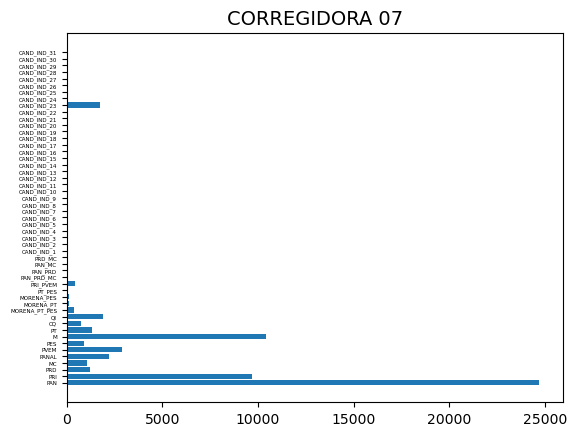

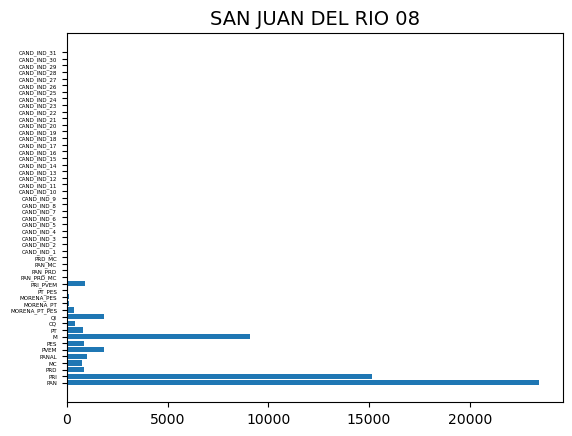

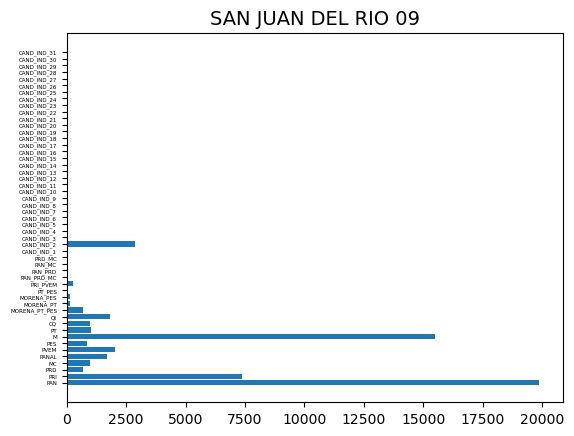

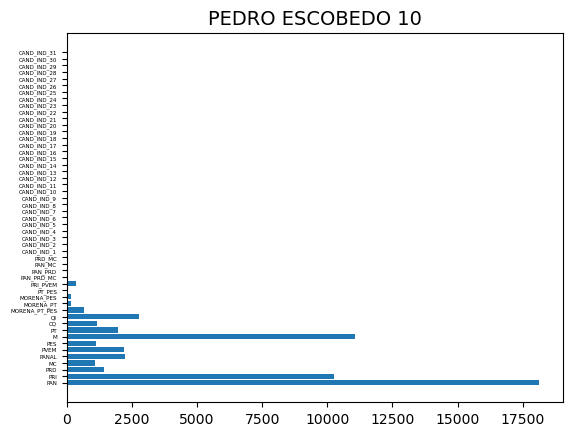

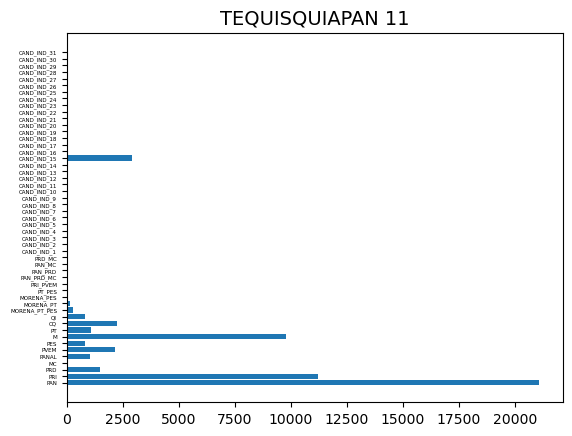

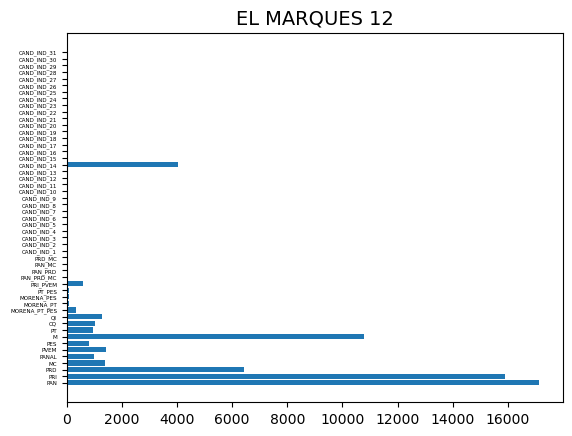

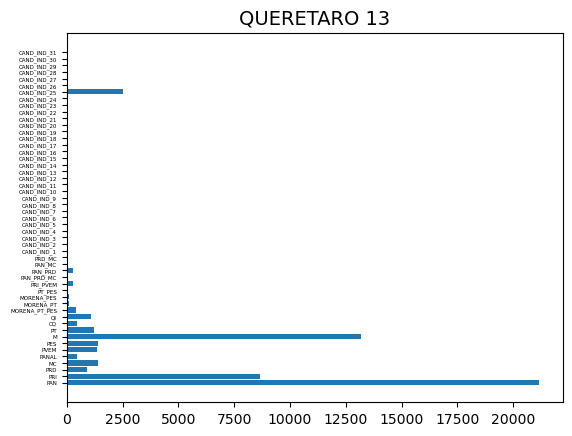

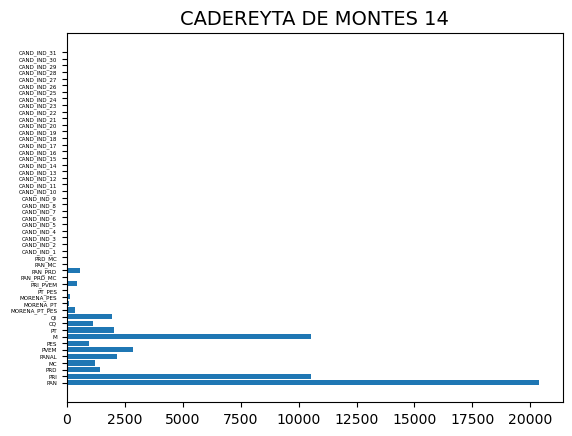

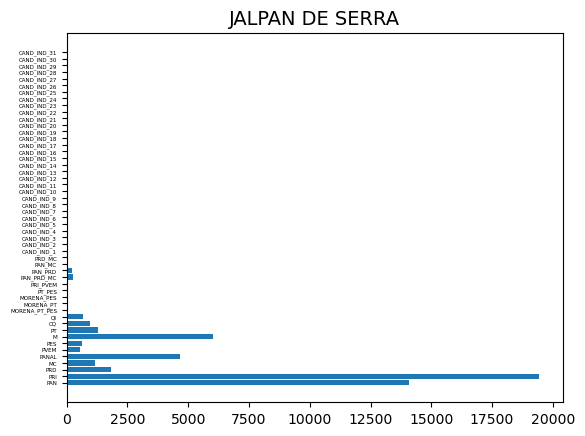

In [157]:
nombres_distritos=obten_distritos_unicos(distritos)

for d in nombres_distritos:
    registros_p_distrito=df.query('DISTRITO_LOCAL == @d')
    partidos=registros_p_distrito[registros_p_distrito.columns[16:67]]
    partidos_list=[]
    for i in range(len(list(partidos))):
        votos_partido=list(partidos[partidos.columns[i]])
        r=[]
        for j in votos_partido:
            try:
                r.append(int(j))
            except:
                pass
        partidos_list.append(r)

    totales=[]
    for l in partidos_list:
        totales.append(sum(l))
    nombres_part = partidos.columns.values
    
    plt.rc('ytick', labelsize=4)
    plt.rc('xtick', labelsize=10)
    fig,ax = plt.subplots()
    ax.barh(nombres_part,totales)
    plt.title(d, fontsize=14)
    plt.show()